### Draft code for Labb3 Linear Calssifier

In [67]:
import matplotlib.pyplot as plt
import numpy as np

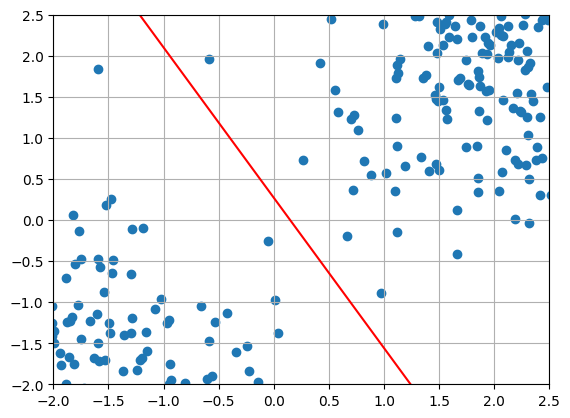

In [85]:
# Formmeln för den röda linjen är y = -1,83*x + 1,369

with open ("F:/AI-24-programering/Python-programing-Hannes-Fredriksson/Labs/Data/unlabelled_data.csv", "r") as unlable_data_r:
    train_data =[point.strip().split(",") for point in unlable_data_r.readlines()]
    train_data = [[float(point) for point in points] for points in train_data]

plt.scatter(*zip(*train_data))
plt.axline((-0.3, 0.82),slope=-1.83, color="red")
plt.grid()
plt.xlim(-2, 2.5)
plt.ylim(-2, 2.5)
plt.show()